In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
dataframe = pandas.read_csv('data/XBTEUR_15.csv', usecols=[1], engine='python')
print(dataframe)

            97.0
0          99.90
1          98.20
2          96.91
3          96.80
4          96.75
...          ...
290461  41300.00
290462  41350.70
290463  41278.40
290464  41271.10
290465  41051.30

[290466 rows x 1 columns]


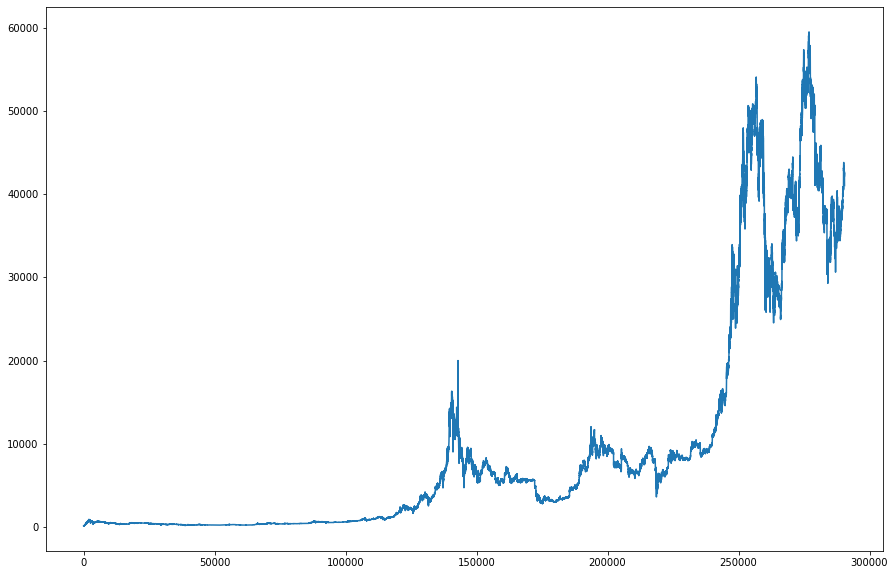

In [3]:
plt.figure(figsize=(15,10))
plt.plot(dataframe)

In [4]:
dataset = dataframe[170000:]
print(dataset)

           97.0
170000   5594.2
170001   5594.2
170002   5592.6
170003   5591.8
170004   5592.3
...         ...
290461  41300.0
290462  41350.7
290463  41278.4
290464  41271.1
290465  41051.3

[120466 rows x 1 columns]


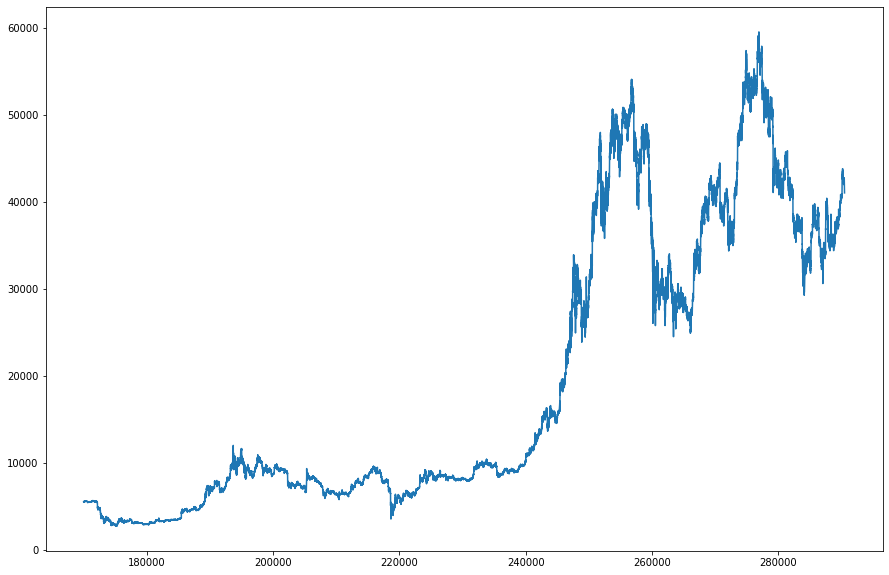

In [5]:
plt.figure(figsize=(15,10))
plt.plot(dataset)

In [6]:
dataset_val = dataset.values
dataset_val = dataset_val.astype('float32')
print(dataset_val)

[[ 5594.2]
 [ 5594.2]
 [ 5592.6]
 ...
 [41278.4]
 [41271.1]
 [41051.3]]


In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_val = scaler.fit_transform(dataset_val)

In [8]:
train_size = int(len(dataset) * 0.90)
val_size = int((len(dataset) - train_size) / 2)
test_size = val_size

print(f'Tran: {train_size}\nValidation: {val_size} \nTest: {test_size}')


Tran: 108419
Validation: 6023 
Test: 6023


In [9]:
train = dataset_val[0:train_size,:]
# print(train)
print(len(train))

val = dataset_val[train_size:len(dataset_val)-val_size,:]
# print(val)
print(len(val))

test = dataset_val[train_size+val_size:len(dataset_val),:]
# print(test)
print(len(test))

108419
6024
6024


In [10]:
def create_windows(dataset, look_back=1):
	features, labels = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		features.append(a)
		labels.append(dataset[i + look_back, 0])
	return np.array(features), np.array(labels)

# to make forecast based on last 24 hours:
# look_back = (24 * 60) / 15 = 96
look_back = 96
train_x, train_y = create_windows(train, look_back)
val_x, val_y = create_windows(val, look_back)
test_x, test_y = create_windows(test, look_back)

print(train_x[:1])
print(train_y[:1])

[[0.04960848 0.04960848 0.04958029 0.0495662  0.049575   0.049575
  0.04958558 0.04957677 0.04961024 0.04965604 0.04965076 0.04967542
  0.04965252 0.04963314 0.04964547 0.04965076 0.04963667 0.04962434
  0.0496261  0.04962081 0.0495063  0.04948517 0.04952041 0.04953096
  0.04951688 0.04960319 0.0496578  0.04966838 0.04967014 0.04960848
  0.04961905 0.04957325 0.04948341 0.04948869 0.04946755 0.04961376
  0.0495063  0.04947283 0.04948869 0.04951512 0.04953096 0.04950807
  0.04943584 0.04927025 0.04925792 0.04927025 0.04920155 0.04919979
  0.04925263 0.04913461 0.04915046 0.04922798 0.04920683 0.04915046
  0.04909762 0.04918394 0.04930196 0.04935657 0.04953977 0.04939533
  0.04942175 0.04936891 0.049383   0.04937067 0.04940766 0.04941295
  0.04942175 0.04941646 0.04932838 0.04930725 0.04931782 0.04931253
  0.04935305 0.0493231  0.04934071 0.04926145 0.04919626 0.04918921
  0.04911171 0.04914694 0.04917865 0.04924559 0.04920683 0.04926849
  0.04943584 0.04945522 0.04940061 0.04933014 0.04

In [11]:
# The LSTM network expects the input data in the form of: [samples, time steps, features]
# Currently, our data is in the form: [samples, features]

train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
val_x = np.reshape(val_x, (val_x.shape[0], 1, val_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

print(train_x.shape)
print(val_x.shape)
print(test_x.shape)

(108322, 1, 96)
(5927, 1, 96)
(5927, 1, 96)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

In [13]:
model = Sequential()
model.add(LSTM(100, input_shape=(1, look_back)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               78800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 78,901
Trainable params: 78,901
Non-trainable params: 0
_________________________________________________________________


2022-04-26 17:50:33.738194: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 17:50:33.766735: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 17:50:33.766905: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 17:50:33.767218: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [14]:
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=["accuracy"])
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=1000, batch_size=1000, verbose=False)

2022-04-26 17:50:35.675137: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8204
2022-04-26 17:50:36.234729: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


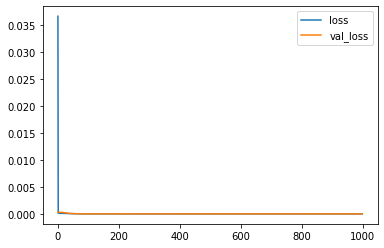

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [16]:
train_preds = model.predict(train_x)
test_preds = model.predict(test_x)

In [17]:
# invert predictions
train_preds = scaler.inverse_transform(train_preds)
train_y = scaler.inverse_transform([train_y])
test_preds = scaler.inverse_transform(test_preds)
test_y = scaler.inverse_transform([test_y])
# calculate root mean squared error
train_score = math.sqrt(mean_squared_error(train_y[0], train_preds[:,0]))
print('Train Score: %.2f RMSE' % (train_score))
test_score = math.sqrt(mean_squared_error(test_y[0], test_preds[:,0]))
print('Test Score: %.2f RMSE' % (test_score))

Train Score: 109.43 RMSE
Test Score: 135.35 RMSE


In [18]:
test_predict_plot = np.empty_like(dataset[train_size+val_size:len(dataset_val):])
test_predict_plot[:, :] = np.nan
test_predict_plot = test_preds
print(test_predict_plot.shape)

(5927, 1)


In [19]:
ground_truth = dataset_val[train_size+val_size:len(dataset_val):]
ground_truth = scaler.inverse_transform(ground_truth[look_back+1:])
print(ground_truth.shape)

(5927, 1)


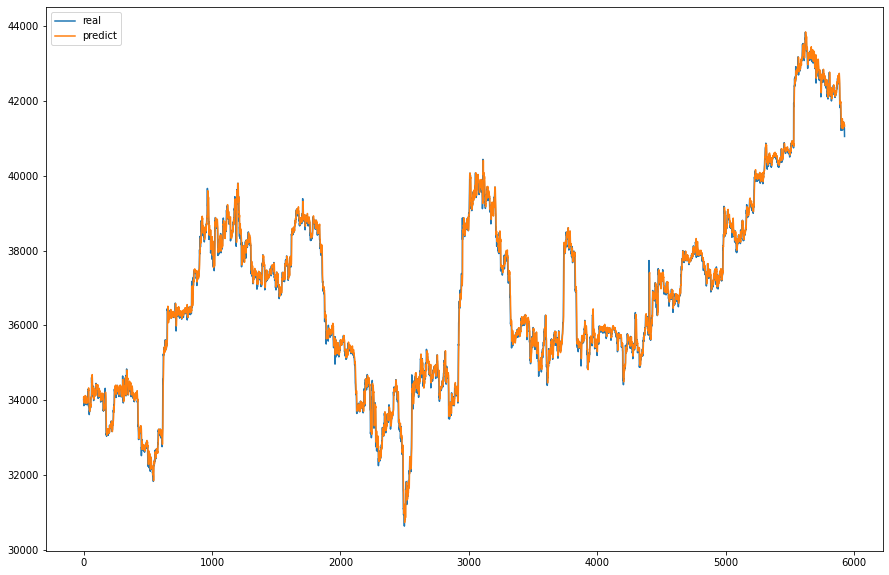

In [20]:
plt.figure(figsize=(15,10))
plt.plot(ground_truth, label='real')
plt.plot(test_predict_plot, label='predict')
plt.legend()

In [29]:
# print(ground_truth)
# print(test_predict_plot)
# print(len(ground_truth))
# print(len(test_predict_plot))

preds = {'up':{'right':0,'wrong':0},'down':{'right':0,'wrong':0},'same':{'right':0,'wrong':0}}
# preds_false = {'up':[],'down':[],'same':[]}
tolerance = 0.002
for i in range(1,len(ground_truth)):
    # new > old -> ++
    # old > new -> --
    # new ~= old -> +- tolerance
    trend = test_predict_plot[i]-test_predict_plot[i-1]
    actual_trend = ground_truth[i]-ground_truth[i-1]
    if trend >= test_predict_plot[i-1]*tolerance or trend <= -test_predict_plot[i-1]*tolerance:
        if trend > 0:
            if actual_trend > 0:
                preds['up']['right'] += 1
            if actual_trend < 0:
                preds['up']['wrong'] += 1

        if trend < 0:
            if actual_trend < 0:
                preds['down']['right'] += 1
            if actual_trend > 0:
                preds['down']['wrong'] += 1

    else:
        if actual_trend >= ground_truth[i-1]*tolerance or actual_trend <= -ground_truth[i-1]*tolerance:
            preds['same']['wrong'] += 1
        else:
            preds['same']['right'] += 1
    # print(trend,actual_trend,test_predict_plot[i-1]*tolerance,-test_predict_plot[i-1]*tolerance)
    # break
            

print(preds)

{'up': {'right': 429, 'wrong': 455}, 'down': {'right': 385, 'wrong': 480}, 'same': {'right': 2754, 'wrong': 1421}}
